In [42]:
from set_math import *

In [43]:
from set_visualization import *

# load & merge dataset

In [44]:
sales = pd.read_csv('../../data/basic/train.csv')
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv', index_col=0)

In [45]:
print(sales.shape)
sales.head()

(4617600, 4)


,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [46]:
print(key.shape)
key.head()

(45, 2)


,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [47]:
print(weather.shape)
weather.head()

(20517, 27)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,1,2012-01-01,52.0,31.0,42.0,0.0,36.0,40.0,23.0,0.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,1,2012-01-02,50.0,31.0,41.0,0.0,26.0,35.0,24.0,0.0,...,29.62,9.8,24.0,10.3,RA,2012,"['01', '02']",2,Mon,holiday_work
2,1,2012-01-03,32.0,11.0,22.0,0.0,4.0,18.0,43.0,0.0,...,29.87,10.8,31.0,11.6,MO,2012,"['01', '03']",3,Tue,workday
3,1,2012-01-04,28.0,9.0,19.0,0.0,-1.0,14.0,46.0,0.0,...,30.03,6.3,27.0,8.3,MO,2012,"['01', '04']",4,Wed,workday
4,1,2012-01-05,38.0,25.0,32.0,0.0,13.0,25.0,33.0,0.0,...,29.84,6.9,25.0,7.8,MO,2012,"['01', '05']",5,Thi,workday


In [48]:
weather['days'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [49]:
weather.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_YN',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'codesum_2', 'year', 'monthday', 'days',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [50]:
sales = pd.merge(sales, key)

In [51]:
df = pd.merge(sales, weather)

In [52]:
print(df.shape)
df.head()

(4617600, 30)


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday


In [53]:
df = pd.DataFrame(data=df, columns=['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 
                                    'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 
                                    'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_2', 'codesum_YN', 
                                    'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
                                    'year', 'monthday', 'days', 'dayofweek', 'is_holiday'])

### 판매가 이루어진 데이터로 한정

In [54]:
df = df[df['units'] > 0].reset_index(drop=True)

In [55]:
df.shape

(118696, 30)

### 날짜 데이터 encoding

In [56]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

def dayofweek_num(dayofweek):
    if dayofweek == 'Mon':
        return 1
    elif dayofweek == 'Tue':
        return 2
    elif dayofweek == 'Wed':
        return 3
    elif dayofweek == 'Thi':
        return 4
    elif dayofweek == 'Fri':
        return 5
    elif dayofweek == 'Sat':
        return 6
    elif dayofweek == 'Sun':
        return 7

In [57]:
df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['dayofweek'] = df['dayofweek'].apply(dayofweek_num)
df['dayofweek'] = df['dayofweek'].astype(int)

In [58]:
df

,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,resultspeed,resultdir,avgspeed,year,monthday,days,dayofweek,is_holiday,month,day
0,2012-01-01,29,1,9,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
1,2012-01-01,2,1,28,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
2,2012-01-01,1,1,51,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
3,2012-01-02,60,1,9,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
4,2012-01-02,5,1,28,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
5,2012-01-02,1,1,51,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
6,2012-01-03,15,1,9,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,2012,"['01', '03']",3,2,workday,1,3
7,2012-01-03,9,1,28,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,2012,"['01', '03']",3,2,workday,1,3
8,2012-01-04,20,1,9,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,2012,"['01', '04']",4,3,workday,1,4
9,2012-01-04,3,1,28,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,2012,"['01', '04']",4,3,workday,1,4


In [59]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# OLS 모델 생성 카테고리형 독립변수만 고려

In [60]:
df_test = df
df_test

,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,resultspeed,resultdir,avgspeed,year,monthday,days,dayofweek,is_holiday,month,day
0,2012-01-01,29,1,9,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
1,2012-01-01,2,1,28,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
2,2012-01-01,1,1,51,1,52.000000,31.000000,42.000000,0.000000,36.0,...,3.6,20.0,4.600000,2012,"['01', '01']",1,7,holiday,1,1
3,2012-01-02,60,1,9,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
4,2012-01-02,5,1,28,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
5,2012-01-02,1,1,51,1,50.000000,31.000000,41.000000,0.000000,26.0,...,9.8,24.0,10.300000,2012,"['01', '02']",2,1,holiday_work,1,2
6,2012-01-03,15,1,9,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,2012,"['01', '03']",3,2,workday,1,3
7,2012-01-03,9,1,28,1,32.000000,11.000000,22.000000,0.000000,4.0,...,10.8,31.0,11.600000,2012,"['01', '03']",3,2,workday,1,3
8,2012-01-04,20,1,9,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,2012,"['01', '04']",4,3,workday,1,4
9,2012-01-04,3,1,28,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,6.3,27.0,8.300000,2012,"['01', '04']",4,3,workday,1,4


In [61]:
features = df_test.columns
features = " ".join(features)
features = features.replace(" ", " + ")
features

'date + units + store_nbr + item_nbr + station_nbr + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + codesum + codesum_2 + codesum_YN + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + year + monthday + days + dayofweek + is_holiday + month + day'

In [62]:
model_1 = sm.OLS.from_formula('units ~ C(store_nbr) + C(item_nbr) + C(station_nbr) + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + C(codesum) + C(codesum_2) + C(codesum_YN) + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + C(year) + C(day) + C(dayofweek) + C(is_holiday) + C(month)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     296.4
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:48:40   Log-Likelihood:            -5.7249e+05
No. Observations:              118696   AIC:                         1.146e+06
Df Residuals:                  118056   BIC:                         1.152e+06
Df Model:                         639                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

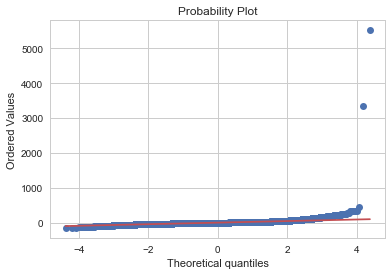

Chi^2       : 409024.785
P-value     :  0.000


In [63]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# Outlier 제거

In [64]:
# 1차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [65]:
df_test.drop(list(drop_index),inplace=True)

In [66]:
model_1 = sm.OLS.from_formula('units ~ C(store_nbr) + C(item_nbr) + C(station_nbr) + tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + C(codesum) + C(codesum_2) + C(codesum_YN) + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + C(year) + C(day) + C(dayofweek) + C(is_holiday) + C(month)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     646.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:49:28   Log-Likelihood:            -4.9700e+05
No. Observations:              115702   AIC:                         9.953e+05
Df Residuals:                  115062   BIC:                         1.001e+06
Df Model:                         639                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

선택적 변수 제거

In [68]:
model_1 = sm.OLS.from_formula('units ~ C(store_nbr) + C(item_nbr) + C(station_nbr) + tmax + depart + dewpoint + wetbulb + heat + sunrise + sunset + C(codesum_2) + stnpressure + sealevel + C(year) + C(dayofweek) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1847.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:49:53   Log-Likelihood:            -4.9747e+05
No. Observations:              115702   AIC:                         9.954e+05
Df Residuals:                  115479   BIC:                         9.975e+05
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

다항

In [76]:
model_1 = sm.OLS.from_formula('units ~ C(store_nbr) + C(item_nbr) + C(station_nbr)depart + dewpoint + wetbulb + heat + sunrise + sunset + C(codesum_2) + stnpressure + sealevel + C(year) + C(dayofweek) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1839.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:57:10   Log-Likelihood:            -4.9747e+05
No. Observations:              115702   AIC:                         9.954e+05
Df Residuals:                  115478   BIC:                         9.975e+05
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [38]:
# 2차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [39]:
df_test.drop(list(drop_index),inplace=True)

In [41]:
model_1 = sm.OLS.from_formula('units ~ C(store_nbr) + C(item_nbr) + C(station_nbr) + tmax + depart + dewpoint + wetbulb + heat + sunrise + sunset + C(codesum_2) + stnpressure + sealevel + C(year) + C(dayofweek) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2385.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        02:47:26   Log-Likelihood:            -4.3620e+05
No. Observations:              108586   AIC:                         8.728e+05
Df Residuals:                  108363   BIC:                         8.750e+05
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 3차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 4차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 5차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 6차 제거
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# 정규화 (sci-kit learn)

In [ ]:
from sklearn.datasets import make_regression
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
# patsy를 통한 formula 생성
y, X = dmatrices( "np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)", df_test , return_type = 'dataframe' )

In [ ]:
# y, X, Linear Regression, Ridge, Lasso, ElasticNet
model_LR = LinearRegression().fit(X, y)
model_ridge = Ridge(alpha=0.5).fit(X, y)
model_lasso = Lasso(alpha=0.5).fit(X, y)
model_EN = ElasticNet(alpha=0.5).fit(X, y)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

# 모델에 제출하기에 앞선 cross-validation 결과 및 RMSLE 채점 결과

In [ ]:
# RMSLE 구현 / 긁어왔습니다 
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

In [ ]:
cross_val_score(model_ridge, X, y, cv=10, scoring=rmsle_score).mean()

# 제출을 위한 test파일 준비

### test file preprocessing

In [ ]:
test = pd.read_csv('../../data/basic/test.csv')
print(test.shape)
test.head()

In [ ]:
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv')

In [ ]:
test = pd.merge(test, key)

In [ ]:
test = pd.merge(test, weather)

In [ ]:
test.columns

In [ ]:
test = pd.DataFrame(test, columns=['date','dayofweek', 'is_holiday', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       ])

In [ ]:
test.head()

In [ ]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [ ]:
test['is_holiday'] = test['is_holiday'].apply(is_holiday)

In [ ]:
test['year'] = test['date'].apply(make_year)
test['month'] = test['date'].apply(make_month)
test['day'] = test['date'].apply(make_day)
test['dayofweek'] = test['dayofweek'].apply(dayofweek_num)

In [ ]:
test_sample = test.drop(columns=['date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset','depart',  'codesum', 'codesum_YN', 'snowfall',
       'stnpressure', 'sealevel','resultdir', 'avgspeed',
       'station_nbr', 'heat', 'cool', 'preciptotal', 'is_holiday', 'resultspeed'])

In [ ]:
test_sample.head()

In [ ]:
test_X_df = pd.DataFrame(columns=['item_nbr', 'store_nbr','dayofweek', 'year', 'month', 'day'])

for nbr in range(1, 45+1):
    store_nbr = df_test[df_test['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_sample[test_sample['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_df = pd.concat([test_X_df, to_test_df], axis = 0)
    
test_X_df.shape

In [ ]:
test_X_df.head()

In [ ]:
test_X_df['store_nbr'] = test_X_df['store_nbr'].astype(int)
test_X_df['item_nbr'] = test_X_df['item_nbr'].astype(int)
test_X_df['year'] = test_X_df['year'].astype(int)
test_X_df['month'] = test_X_df['month'].astype(int)
test_X_df['day'] = test_X_df['day'].astype(int)
test_X_df['dayofweek'] = test_X_df['dayofweek'].astype(object)

### Predict

In [ ]:
result_1 = model_1.fit_regularized(alpha=0.5, L1_wt=0)

In [ ]:
test_result = result_1.predict(test_X_df)

### create submission file

In [ ]:
result = pd.concat([test, test_result], axis=1)

In [ ]:
print(result.shape)
result.head()

In [ ]:
result['units'] = result[0]

In [ ]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

In [ ]:
result['units'] = result['units'].apply(itiszero)

In [ ]:
result['units'] = result['units'].astype(int)

In [ ]:
result = pd.DataFrame(data=result, columns=['store_nbr', 'item_nbr', 'date', 'units'])

In [ ]:
for col in result[['store_nbr', 'item_nbr']]:
    result[col] = result[col].astype(int)

In [ ]:
result['id'] = result['store_nbr'].astype(str)+'_'+result['item_nbr'].astype(str)+'_'+result['date'].astype(str)

In [ ]:
for_submission = result.loc[:,['id','units']]

In [ ]:
for_submission.head()

In [ ]:
for_submission.to_csv('submission_sample19.csv', index=False)

### 제출

1차 제출 : fox outlier recommendation 1번 --> submission_sample12.csv --> 0.328

2차 제출 : outlier 제거 1번 --> submission_sample13.csv --> 0.327

3차 제출 : outlier 제거 2번 --> submission_sample14.csv --> 0.313

4차 제출 : outlier 제거 3번 --> submission_sample15.csv --> 0.287

5차 제출 : outlier 제거 4번 --> submission_sample16.csv --> 0.267

6차 제출 : outlier 제거 5번 --> submission_sample17.csv --> 0.277

7차 제출 : outlier 제거 6번 --> submission_sample18.csv --> 0.274

8차 제출 : outlier 제거 6번 + 릿지 정규화 --> submission_sample19.csv --> 0.46

# 이번 시도의 결론, 

- 아웃라이어 제거 6번 이후에는 효과가 미비함
- 정규화의 영향 : 더 안 좋음